In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
haberman= pd.read_csv("haberman.csv",sep=',',names=['Age','Operation_Age','Axillary_Nodes','Survival_Status'])


In [3]:
print(haberman.shape)

(306, 4)


In [4]:
pd.DataFrame(haberman)

,Age,Operation_Age,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
print(haberman.columns)

Index(['Age', 'Operation_Age', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


In [6]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

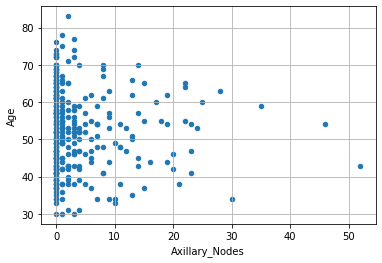

In [7]:
haberman.plot(kind='scatter', x='Axillary_Nodes', y='Age') 
plt.grid()
plt.show()

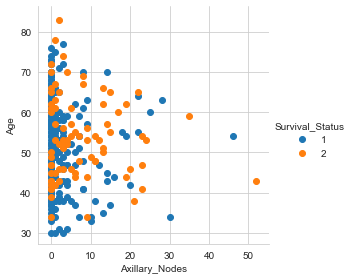

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survival_Status", height=4) \
 .map(plt.scatter, "Axillary_Nodes", "Age") \
 .add_legend();
plt.show();

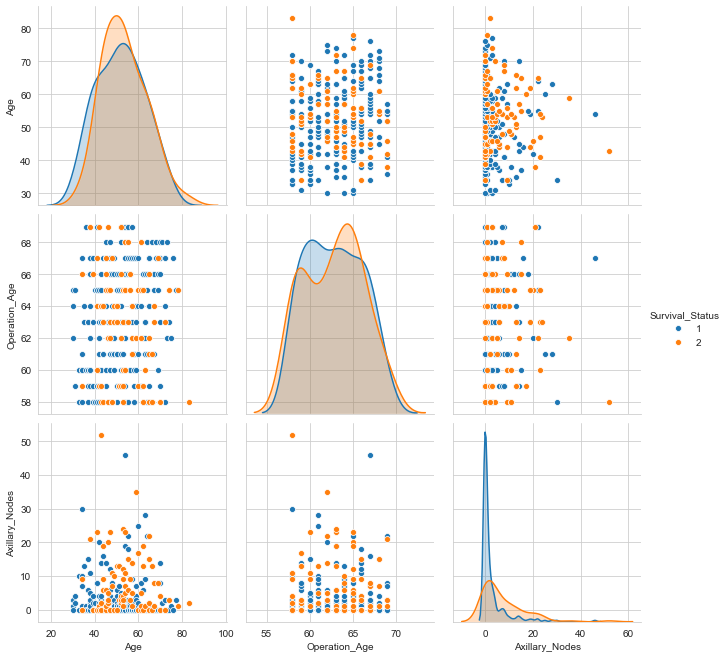

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status",height=3, vars=['Age','Operation_Age', 'Axillary_Nodes'])
plt.show()

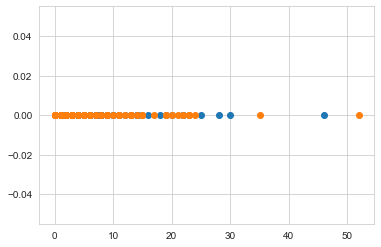

In [10]:
import numpy as np
haberman_Long_Survive = haberman.loc[haberman["Survival_Status"] == 1];
haberman_Short_Survive = haberman.loc[haberman["Survival_Status"] == 2];
plt.plot(haberman_Long_Survive["Axillary_Nodes"], np.zeros_like(haberman_Long_Survive['Axillary_Nodes']), 'o')
plt.plot(haberman_Short_Survive["Axillary_Nodes"], np.zeros_like(haberman_Short_Survive['Axillary_Nodes']), 'o')
plt.show()

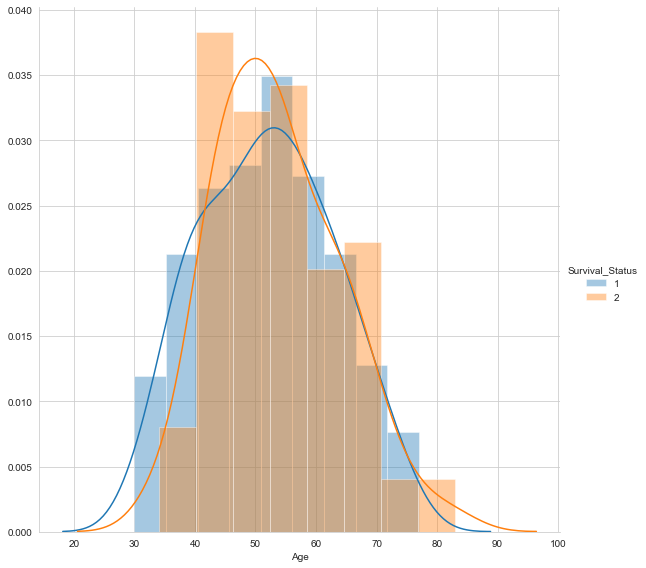

In [11]:
sns.FacetGrid(haberman,hue="Survival_Status", height=8).map(sns.distplot,"Age").add_legend()

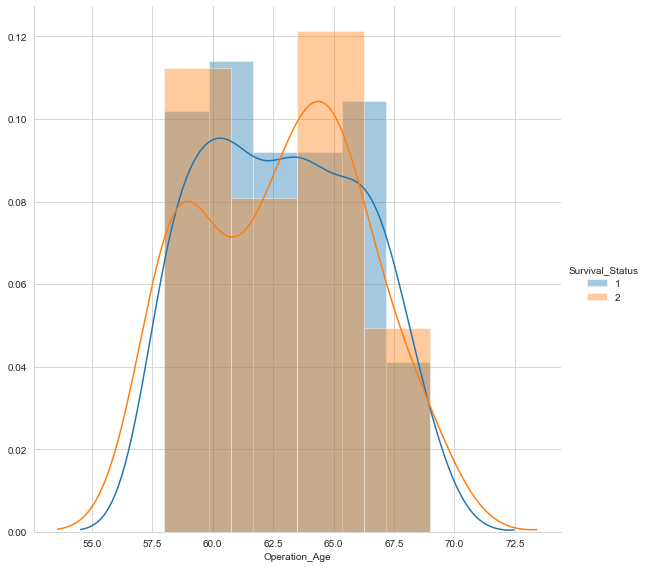

In [12]:
sns.FacetGrid(haberman,hue="Survival_Status", height=8).map(sns.distplot,"Operation_Age").add_legend()

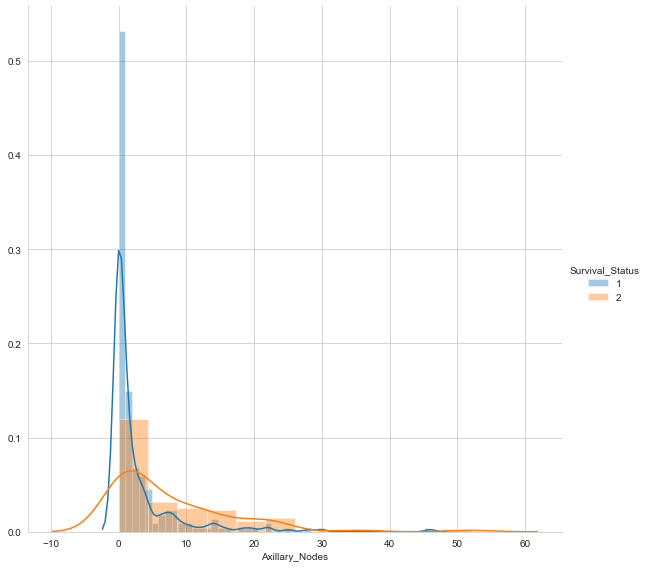

In [13]:
sns.FacetGrid(haberman,hue="Survival_Status", height=8).map(sns.distplot,"Axillary_Nodes").add_legend()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


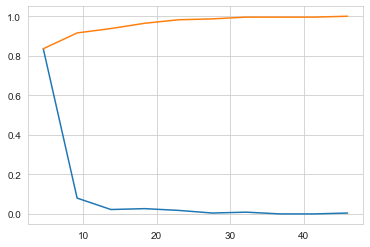

In [14]:
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


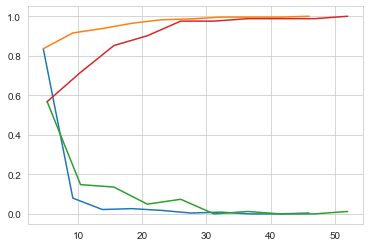

In [15]:
counts, bin_edges = np.histogram(haberman_Long_Survive['Axillary_Nodes'], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_Short_Survive['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();


In [16]:
print("Means:")
print (np.mean(haberman_Long_Survive["Axillary_Nodes"]))
print (np.mean(np.append(haberman_Long_Survive["Axillary_Nodes"],50)))
print (np.mean(haberman_Short_Survive["Axillary_Nodes"]))
print("\nStandard Deviation:")
print(np.mean(haberman_Long_Survive["Axillary_Nodes"]))
print(np.mean(haberman_Short_Survive["Axillary_Nodes"]))

Means:
2.7911111111111113
3.0
7.45679012345679

Standard Deviation:
2.7911111111111113
7.45679012345679


In [17]:
print("Medians:")
print(np.median(haberman_Long_Survive["Axillary_Nodes"]))
print(np.median(np.append(haberman_Long_Survive["Axillary_Nodes"],50)))
print(np.median(haberman_Short_Survive["Axillary_Nodes"]))
print("\nQuantiles:")
print(np.percentile(haberman_Long_Survive["Axillary_Nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive["Axillary_Nodes"],np.arange(0,100,25)))
print("\n90th percentile:")
print(np.percentile(haberman_Long_Survive["Axillary_Nodes"],90))
print(np.percentile(haberman_Short_Survive["Axillary_Nodes"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Long_Survive["Axillary_Nodes"]))
print(robust.mad(haberman_Short_Survive["Axillary_Nodes"]))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


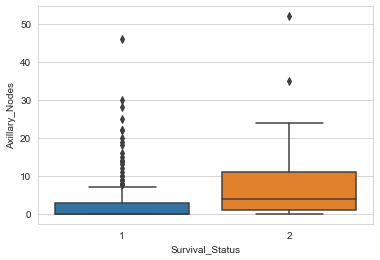

In [18]:
sns.boxplot(x="Survival_Status",y="Axillary_Nodes", data=haberman)
plt.show()


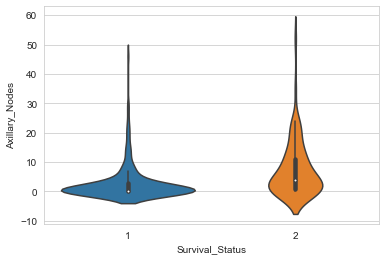

In [19]:
sns.violinplot(x="Survival_Status", y="Axillary_Nodes",data=haberman)
plt.legend
plt.show()

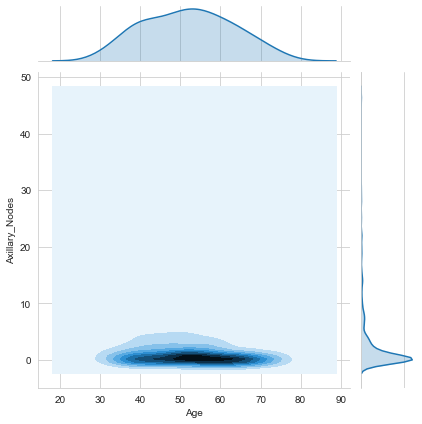

In [21]:
sns.jointplot(x="Age",y="Axillary_Nodes",data=haberman_Long_Survive,kind="kde") 

plt.grid() 

plt.show()